<a href="https://colab.research.google.com/github/devbijoy274/ai_Implementation/blob/master/mnist_fashion_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print(tf.__version__)

1.13.1


In [0]:
fashion_dataset = keras.datasets.fashion_mnist

(train_images,train_labels), (test_images, test_labels) = fashion_dataset.load_data()

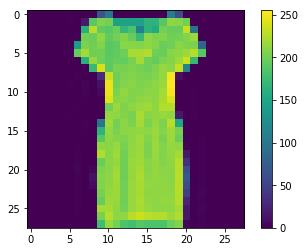

In [10]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[20])
plt.colorbar()
plt.grid = False
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 250.0

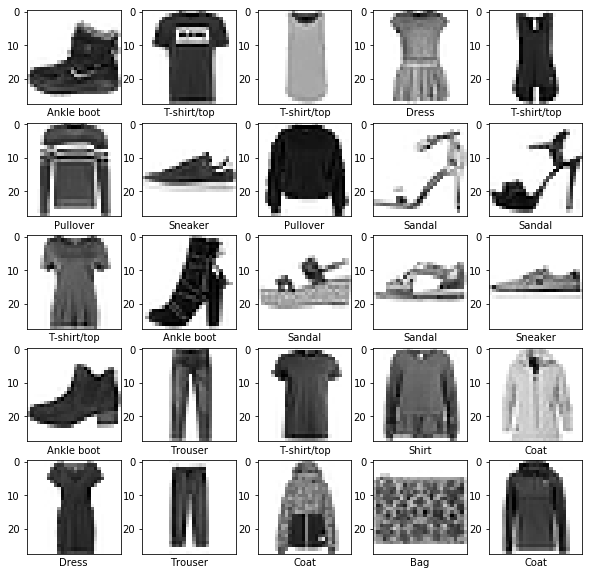

In [12]:
plt.figure(figsize=(10,10))


for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xlabel(classes[train_labels[i]])
  plt.xticks([])
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.grid = False
  
plt.show()

In [14]:
print(train_images.shape)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


(60000, 28, 28)
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(train_images, train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4949 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3719 - acc: 0.8662
Epoch 3/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3352 - acc: 0.8792
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3127 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2953 - acc: 0.8903


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3526 - acc: 0.8752


In [0]:
result = model.predict(test_images)


In [0]:
result_class = [list(val).index(max(list(val))) for val in result]


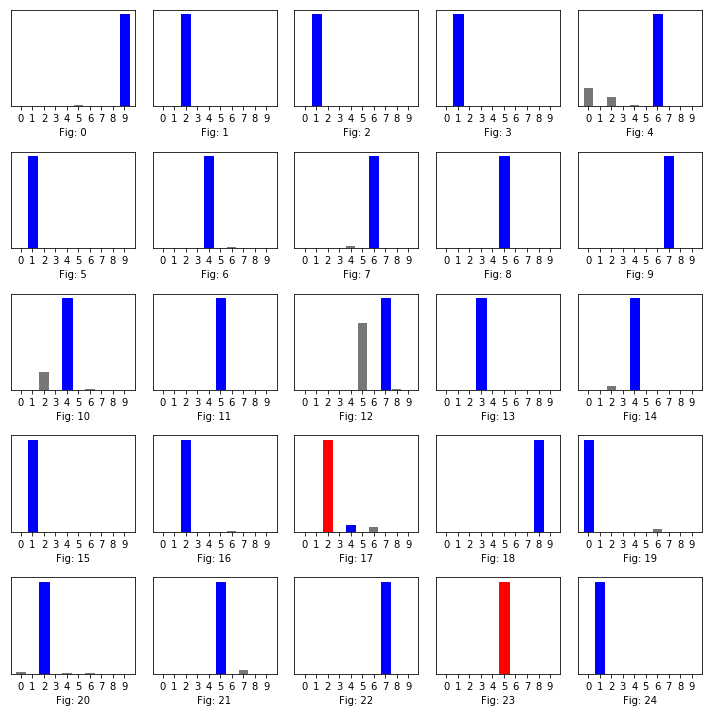

In [32]:
def draw_graph_true_vs_predicted():
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid=False
    plt.xticks(list(range(10)))
    plt.yticks([])
    plt.xlabel("Fig: {}".format(i))
    thisplot = plt.bar(range(10),result[i],color="#777777")
    thisplot[np.argmax(result[i])].set_color('red')
    thisplot[test_labels[i]].set_color('blue')
    plt.tight_layout()

draw_graph_true_vs_predicted()

In [36]:
for i in range(len(result_class)):
  print("{}: {} ({}) := {}".format(i,classes[result_class[i]],result_class[i],test_labels[i]))
  

0: Ankle boot (9) := 9
1: Pullover (2) := 2
2: Trouser (1) := 1
3: Trouser (1) := 1
4: Shirt (6) := 6
5: Trouser (1) := 1
6: Coat (4) := 4
7: Shirt (6) := 6
8: Sandal (5) := 5
9: Sneaker (7) := 7
10: Coat (4) := 4
11: Sandal (5) := 5
12: Sneaker (7) := 7
13: Dress (3) := 3
14: Coat (4) := 4
15: Trouser (1) := 1
16: Pullover (2) := 2
17: Pullover (2) := 4
18: Bag (8) := 8
19: T-shirt/top (0) := 0
20: Pullover (2) := 2
21: Sandal (5) := 5
22: Sneaker (7) := 7
23: Sandal (5) := 9
24: Trouser (1) := 1
25: Pullover (2) := 4
26: Shirt (6) := 6
27: T-shirt/top (0) := 0
28: Ankle boot (9) := 9
29: Dress (3) := 3
30: Bag (8) := 8
31: Bag (8) := 8
32: Dress (3) := 3
33: Dress (3) := 3
34: Bag (8) := 8
35: T-shirt/top (0) := 0
36: Sneaker (7) := 7
37: Sandal (5) := 5
38: Sneaker (7) := 7
39: Ankle boot (9) := 9
40: T-shirt/top (0) := 6
41: Trouser (1) := 1
42: Shirt (6) := 3
43: Sneaker (7) := 7
44: Shirt (6) := 6
45: Sneaker (7) := 7
46: Pullover (2) := 2
47: Trouser (1) := 1
48: Pullover (2) :=